# Solving some classic problems with numpy scipy  

----

By Adam A Miller (Northwestern/CIERA/SkAI)  
10 Sept 2025

As a partial, but certainly not complete (!), example of the utility of `numpy` and `scipy`, this notebook includes some classic problems in physics and solves them numerically. There is also an introduction to random numbers and a brief discussion of monte carlo methods. 

In [4]:
import numpy as np

## Problem 1) The damped harmonic oscillator

A damped harmonic oscillator can be described by three parameters: $m$ the mass of the oscillator, $k$ the spring constant, and $c$ the damping coefficient. 

The equation of motion for this system for this system is: 

$$mx'' + cx' + kx = 0$$

We can solve this ordinary differential equation using scipy. If the initial conditions (i.e., the initial displacement and velocity) are known, then we can evolve the system in time to characterize its motion. 

**Problem 1a**

Write a function `damped_oscillator()` that will return the derivatives ($x'$ and $x''$) for the ODE at times t as a list $[dx/dt, dv/dt]$. The input for the function should be times `t` and a tuple `sv` that contains the state vector of the system (i.e., the position and velocity of the system). Assume that the three parameters $m, k, c$ are known. 

*Hint* – we must write the function in such a way that it can be solved as an initial value problem in `scipy` with [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

In [2]:
def damped_oscillator(t, sv):
    x, v = sv
    xdot = v
    xdotdot = -(c/m)*v - (k/m)*x
    return [xdot, xdotdot]

**Problem 1b**

Use the initial conditions below to solve the initial value problem with `solve_ivp`. 

The inputs for `solve_ivp` are: `fun`: the function from above that will return the derivatives as a 1D array, `t_span`: a 2-tuple (t0, tf) giving the start and end times for the initial value problem, `sv0`: the initial displacement and velocity, and (optional argument) `t_eval` an array of times at which the solution will be reported.

In [8]:
from scipy.integrate import solve_ivp


m = 1.0                       # kg
f0 = 2.5                      # Hz (un-damped natural frequency in Hz)
omega0 = 2*np.pi*f0           # rad/s
k = m * omega0**2             # N/m
zeta = 0.10                   # damping ratio (underdamped if 0 < zeta < 1)
c = 2 * zeta * m * omega0     # N*s/m


# Initial conditions
sv0 = [1.0, 0.0]  # initial displacement and velocity
t_span = (0, 20)
t_eval = np.linspace(*t_span, 500)

sol = solve_ivp(damped_oscillator, t_span, sv0, t_eval=t_eval)

**Problem 1c**

Print the solution `sol` to determine its attributes. Did you successfully solve the ODE?

In [9]:
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.008e-02 ...  1.996e+01  2.000e+01]
        y: [[ 1.000e+00  8.160e-01 ... -2.260e-07 -5.250e-07]
            [ 0.000e+00 -8.690e+00 ... -9.660e-06 -4.862e-06]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1424
     njev: 0
      nlu: 0


**Problem 1d**

Plot the numerical solution for the position as a function of time.

Does the plot correspond with your expectation? Why or why not?

*Note* – feel free to skip this, especially if you are not familiar with `matplotlib`.

Text(0, 0.5, 'x')

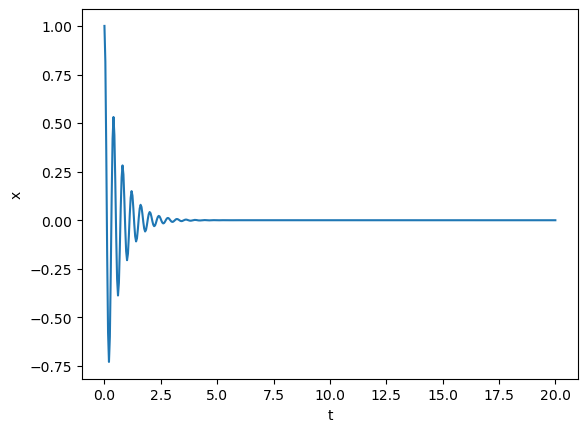

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(t_eval, sol.y[0])
ax.set_xlabel('t')
ax.set_ylabel('x')

## Problem 2) Random number generation

`numpy` has several built in modules to generate (psuedo) random numbers. These are extremely useful for different types of [monte carlo]() tests, where random numbers are drawn to assess different types of probabistic outcomes. 

**Problem 2a** 

`numpy` can generate a random number over the interval $[0, 1)$ using the (`numpy.random.rand()`)[https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html] method. The argument to this function is the dimensions of the array that you would like to be returned. 

Generate a single number between 0 and 1.

In [12]:
print(f'The random number is {np.random.rand()}')

The random number is 0.8997544029668973


**Problem 2b**

Generate 100 random numbers. What is the minimum, maximum, and mean of the numbers that have been drawn? 

In [55]:
rns = np.random.rand(100)

print(f'''The minimum is {np.min(rns):.3f}, 
the maximum is {np.max(rns):.3f}, 
and the mean is {np.mean(rns):.3f}''')

The minimum is 0.017, 
the maximum is 0.994, 
and the mean is 0.468


**Problem 2c**

If you instead generate 10,000 random numbers, do you get answers for the min, max, and mean that are closer to your expectations? 

In [57]:
rns = np.random.rand(10_000)

print(f'''The minimum is {np.min(rns):.6f}, 
the maximum is {np.max(rns):.6f}, 
and the mean is {np.mean(rns):.6f}''')

The minimum is 0.000009, 
the maximum is 0.999690, 
and the mean is 0.497336


**Problem 2d**

Using [`numpy.random.Generator.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) generate 500 random numbers from a Gaussian distribution with a mean of $1851$ and a standard deviation of 6. 

What is the mean and the standard deviation for the randomly generated numbers? Are the answers consistent with your expectations? (what if you change the number of samples?)

*Hint* – be sure that you calculate the *sample* standard deviation.

In [59]:
rng = np.random.default_rng()

nums = rng.normal(loc=1851, scale=6, size=500)

print(f'''The mean of the samples is {np.mean(nums):.2f}, 
and the scatter is {np.std(nums, ddof=1):.2f}''')

The mean of the samples is 1850.97, 
and the scatter is 5.94


## Problem 3) A random walk

Many physical phenomena can be described via a random walk (essentially any process with a moderately high cross section in a moderate to high density medium). In this problem we will simulate a 2D random walk as a proxy for understanding diffusion.  

**Problem 3a** 

To simulate a random walk, draw a random number for a 2D Gaussian distibution where the mean along both axes is 0 and the standard deviation along both axes is 1. (You may assume there is no covariance between the two axes)

*Hint* – if you don't want to use `numpy.random.normal` you can use the [`numpy.Generator.random.multivariate_normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html#numpy.random.Generator.multivariate_normal) method.

In [17]:
rng = np.random.default_rng()

# Mean and covariance (std=1 on both axes, zero correlation)
mu = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.0],
                [0.0, 1.0]])

print(rng.multivariate_normal(mean=mu, cov=cov))

[-0.32450879  0.58133492]


**Problem 3b**

Create a walker that 100 steps. What is the final position of the walker? 

Has it moved more or less than you expected? 

In [61]:
nsteps = 100

# for loop solution
pos = np.array([0.0, 0.0])
for _ in range(nsteps):
    pos += rng.multivariate_normal(mean=pos, cov=cov)

# one line solution
pos = np.sum(rng.multivariate_normal(mean=mu, cov=cov, size=100), axis = 0)

print(f'The walker has moved to {pos}, which is {np.hypot(*pos):.3f} from the origin')

The walker has moved to [-15.81674481  -1.39163346], which is 15.878 from the origin


**Problem 3c**

Simulate 1000 different walkers that each proceed for 10 steps. 

Plot the final position of each walker after 10 steps. Calculate the average position of each walker after 10 steps. Calculate the average distance from the origin of each walker.

In [45]:
rw = rng.multivariate_normal(mean=mu, cov=cov, size=[1000, 10])
print(f'The shape of rw is {rw.shape}')

# final position requires a sum over all the steps 
rw_pos = np.sum(rw, axis = 1)

# calculate the average position
print(f'On average the walkers are located at {np.mean(rw_pos, axis = 0)}')

#calculate the average separation from the origin
print(f'On average the walkers are displaced by {np.mean(np.hypot(*rw_pos.T)):.2f}')

The shape of rw is (1000, 10, 2)
On average the walkers are located at [-0.07201009  0.2425723 ]
On average the walkers are displaced by 3.93


<Figure size 640x480 with 0 Axes>

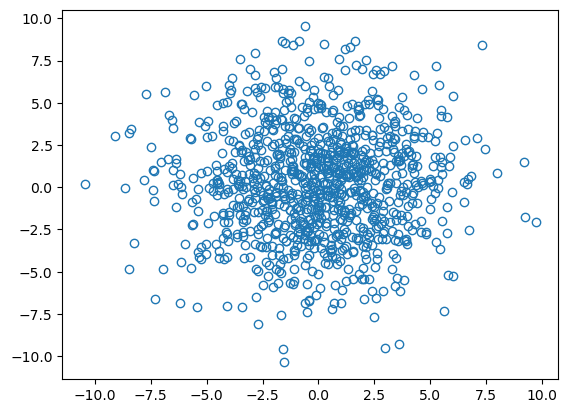

In [48]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(*rw_pos.T, 'o', mfc='None', label='10 steps')
ax.set_xlabel('x')
ax.set_ylabel('y')

**Problem 3d**

Repeat this problem for 1000 walkers and 100 steps. Same thing for 1000 steps. Make a single plot showing the results for all three of these runs. 

Do the results make sense? 

In [49]:
nsteps = 100
rw100 = rng.multivariate_normal(mean=mu, cov=cov, size=[1000, nsteps])

# final position requires a sum over all the steps 
rw_pos100 = np.sum(rw100, axis = 1)

# calculate the average position
print(f'After {nsteps} steps, On average the walkers are located at {np.mean(rw_pos100, axis = 0)}')

#calculate the average separation from the origin
print(f'After {nsteps} steps, On average the walkers are displaced by {np.mean(np.hypot(*rw_pos100.T)):.2f}')

After 100, On average the walkers are located at [-0.6911543   0.05515633]
After 100, On average the walkers are displaced by 12.82


In [51]:
nsteps = 1000
rw1000 = rng.multivariate_normal(mean=mu, cov=cov, size=[1000, nsteps])

# final position requires a sum over all the steps 
rw_pos1000 = np.sum(rw1000, axis = 1)

# calculate the average position
print(f'After {nsteps} steps, On average the walkers are located at {np.mean(rw_pos1000, axis = 0)}')

#calculate the average separation from the origin
print(f'After {nsteps}steps , On average the walkers are displaced by {np.mean(np.hypot(*rw_pos1000.T)):.2f}')

After 1000 steps, On average the walkers are located at [ 3.80407205e-04 -1.68613551e+00]
After 1000steps , On average the walkers are displaced by 39.51


Text(0, 0.5, 'y')

<Figure size 640x480 with 0 Axes>

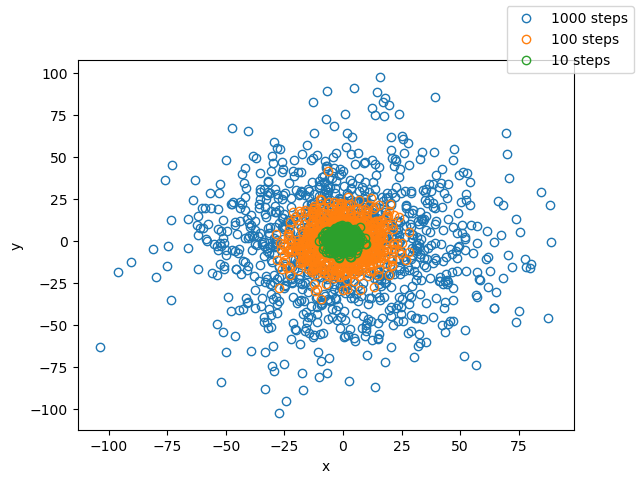

In [66]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(*rw_pos1000.T, 'o', mfc='None', label='1000 steps')
ax.plot(*rw_pos100.T, 'o', mfc='None', label='100 steps')
ax.plot(*rw_pos.T, 'o', mfc='None', label='10 steps')
fig.legend(loc=1)
ax.set_xlabel('x')
ax.set_ylabel('y')